In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Boundry Extraction

In [3]:
def BoundryExtraction(img):
    kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
    erosion = cv2.erode(img, kernel, iterations=1)
    dilation = cv2.dilate(img, kernel, iterations=1)
    beta = img - erosion
    alpha = dilation - img
    gamma = dilation - erosion

    plt.figure(figsize=(10, 7))
    plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(232), plt.imshow(erosion, cmap='gray'), plt.title('Erosion')
    plt.subplot(233), plt.imshow(beta, cmap='gray'), plt.title('BoundryExtraction (img - erosion)')
    plt.subplot(234), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(235), plt.imshow(dilation, cmap='gray'), plt.title('Dilation')
    plt.subplot(236), plt.imshow(alpha, cmap='gray'), plt.title('BoundryExtraction (dilation - img)')
    plt.show()

    plt.imshow(gamma, cmap='gray'), plt.title('BoundryExtraction (dilation - erosion)')
    plt.show()

The code defines a function called `BoundryExtraction` that performs erosion, dilation, and boundary extraction operations on an input image. It uses a predefined kernel for the erosion and dilation operations. The code then calculates the differences between the input image and the erosion result (`beta`), the dilation result and the input image (`alpha`), and the dilation and erosion results (`gamma`). Finally, it uses matplotlib to display the original image, erosion result, dilation result, and the boundary extraction images (`beta`, `alpha`, and `gamma`).

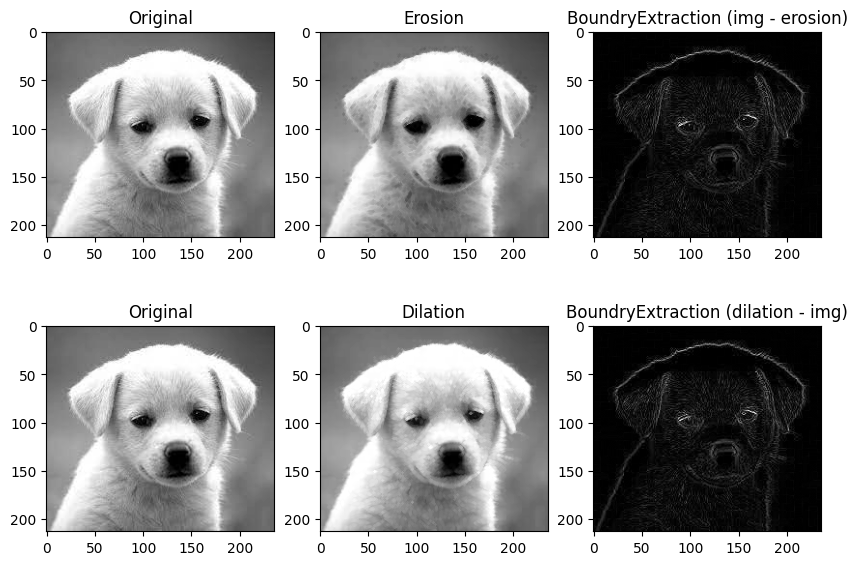

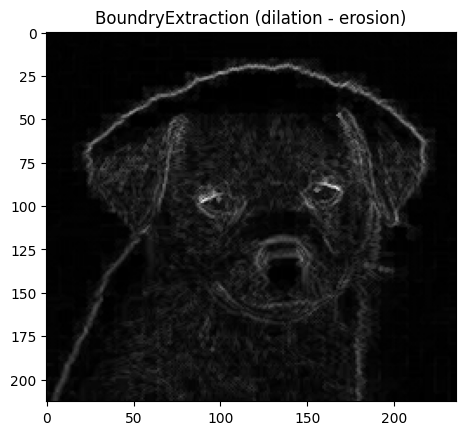

In [5]:
img1 = cv2.imread('gray1.jpeg', 0)
BoundryExtraction(img1)

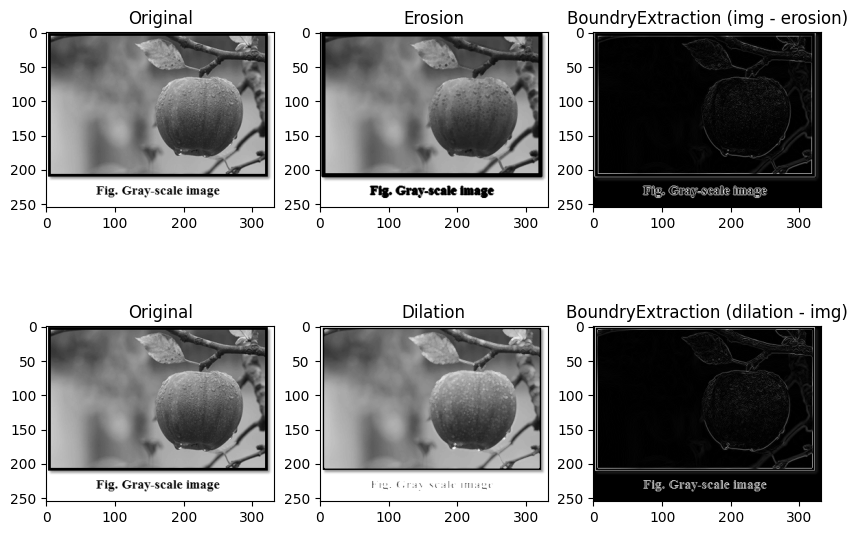

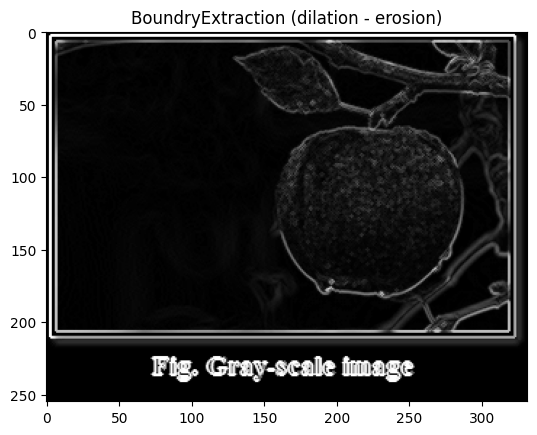

In [9]:
img2 = cv2.imread('gray2.png', 0)
BoundryExtraction(img2)

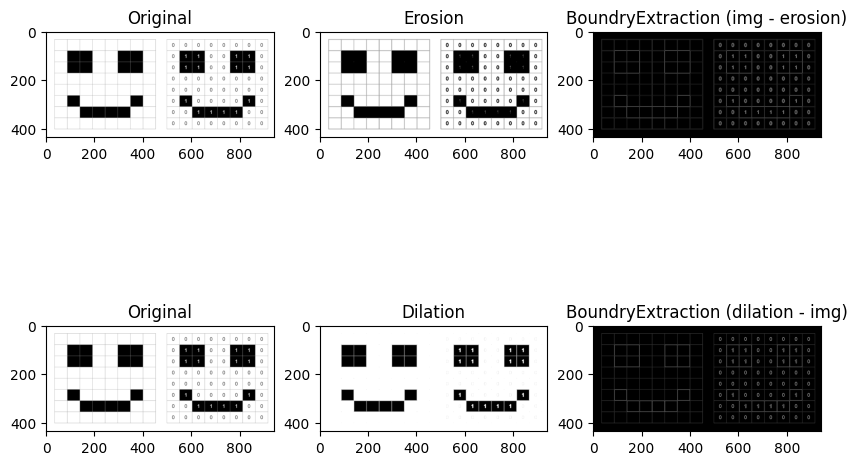

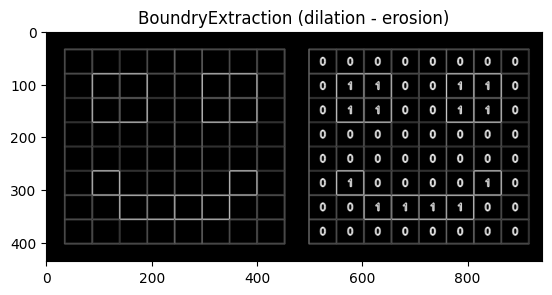

In [11]:
img3 = cv2.imread('b1.png', 0)
BoundryExtraction(img3)

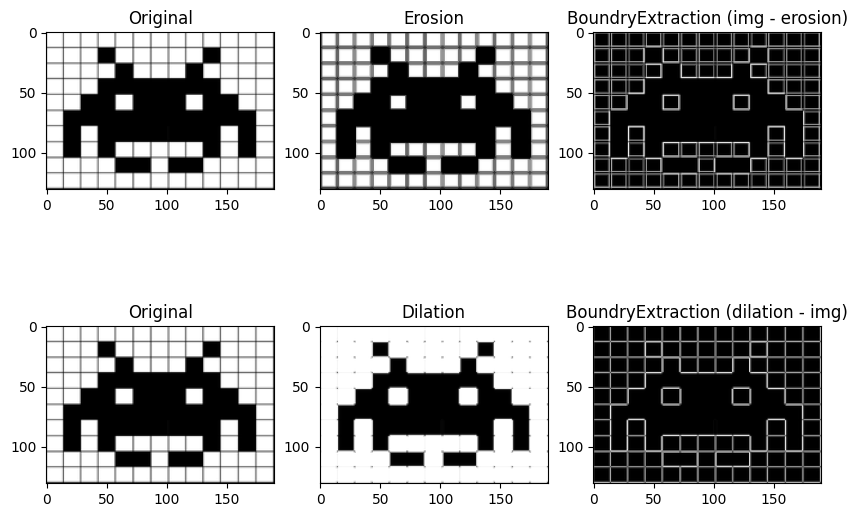

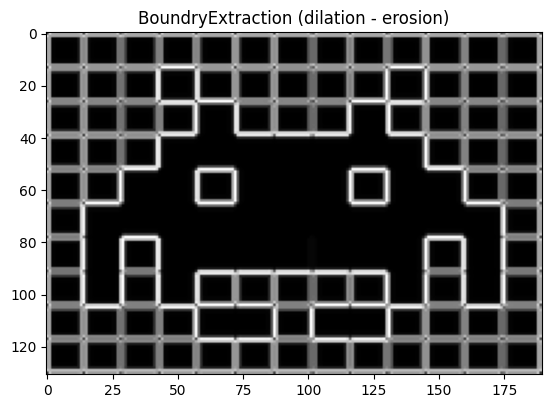

In [12]:
img4 = cv2.imread('b2.png', 0)
BoundryExtraction(img4)

In [13]:
lena = cv2.imread('lena.tif', 0)

LOG Filter : The code applies the Laplacian of Gaussian (LOG) filter to an input image. It first blurs the image using a Gaussian filter, then applies the Laplacian operator to detect edges and fine details. The resulting image is normalized and thresholded to obtain a binary image with clear edges. Finally, the binary image is displayed as the edge map.

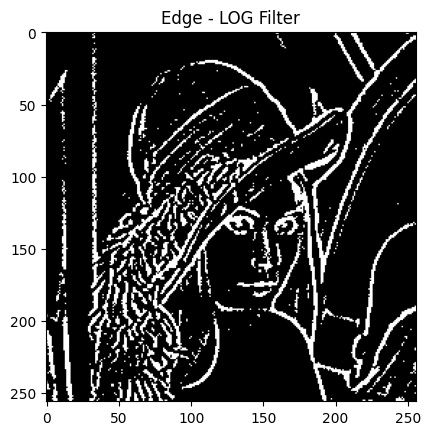

In [14]:
import cv2
import matplotlib.pyplot as plt

def LOG_Filter(img):
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
    laplacian = cv2.Laplacian(blurred_img, cv2.CV_64F)

    laplacian = cv2.normalize(laplacian, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    _, edges = cv2.threshold(laplacian, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    plt.imshow(edges, cmap='gray')
    plt.title('Edge - LOG Filter')
    plt.show()

LOG_Filter(lena)


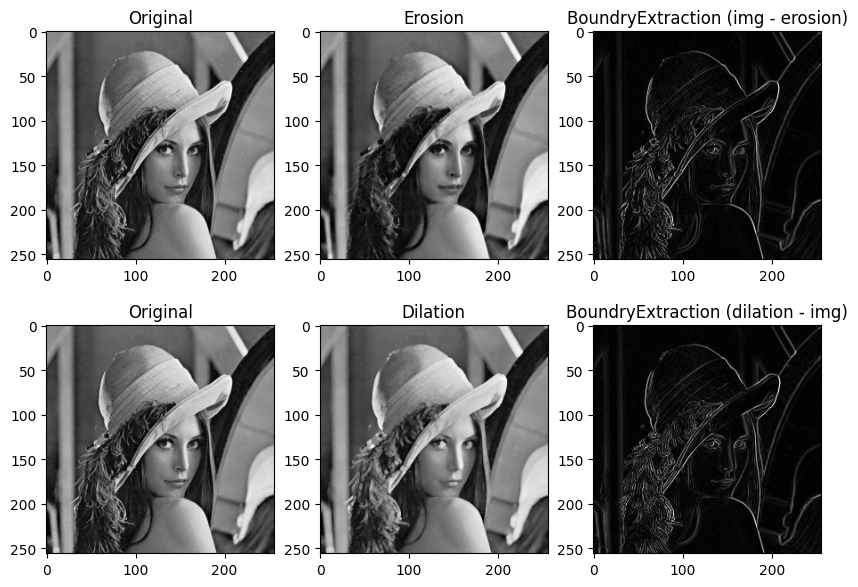

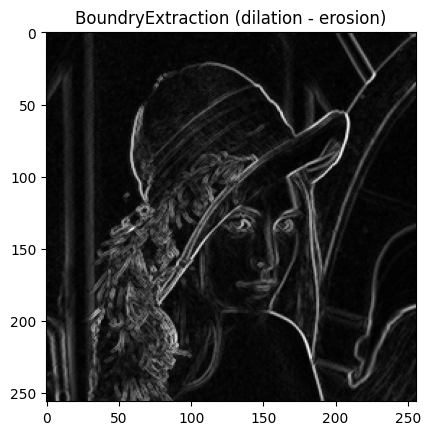

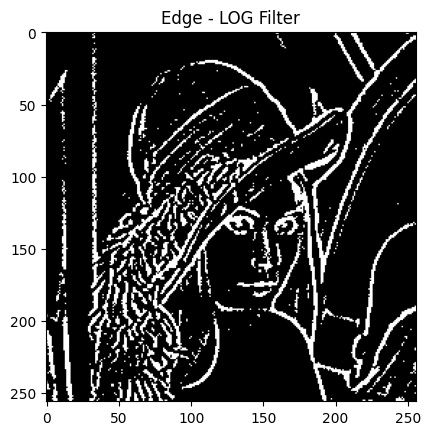

In [16]:
# Compare of BoundryExtraction and LOG_Filter
BoundryExtraction(lena)
LOG_Filter(lena)

It is quite clear that in the Boundary Extraction method the edges are less thick and more delicate

### Hole Filling

In [17]:
def HoleFilling(img):
    _, img_thresh = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)
    img_floodfill = img_thresh.copy()
    
    height, width = img_thresh.shape[:2]
    mask = np.zeros((height+2, width+2), np.uint8)
    
    cv2.floodFill(img_floodfill, mask, (10,10), 255)
    img_floodfill_inverse = cv2.bitwise_not(img_floodfill)
    
    result = img_floodfill_inverse | img_thresh

    plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignial')
    plt.subplot(222), plt.imshow(img_thresh, cmap='gray'), plt.title('Threshold Image')
    plt.subplot(223), plt.imshow(img_floodfill, cmap='gray'), plt.title('FloodFill Image')
    plt.subplot(224), plt.imshow(img_floodfill_inverse, cmap='gray'), plt.title('FloodFill Inverse Image')
    plt.show()
    plt.imshow(result, cmap='gray'), plt.title('Result')
    plt.show()

The function "HoleFilling" takes an input image and performs the following steps:

1. Thresholding: It applies a binary inverse thresholding operation to the input image using a threshold value of 220. This converts the image into a binary image where pixels below the threshold are set to 255 (white) and pixels above the threshold are set to 0 (black). The result is stored in the variable "img_thresh."

2. Flood Filling: It creates a copy of the thresholded image called "img_floodfill" and prepares a mask to keep track of the filled area. Then, it uses the OpenCV function `cv2.floodFill` to perform a flood fill starting from the point (10,10) with a fill value of 255 (white). The result is a filled image where the holes inside the objects are filled. The filled image is stored in "img_floodfill."

3. Inversion: It creates a copy of the filled image called "img_floodfill_inverse" and performs a bitwise NOT operation using `cv2.bitwise_not` to invert the image, making the filled region black and the background white.

4. Result Generation: It combines the inverted flood-filled image with the thresholded image using the bitwise OR operation (`|`). This ensures that the original objects are preserved, and only the holes are filled. The resulting image is stored in the variable "result."

5. Visualization: It uses the matplotlib library to display multiple subplots, showing the original image, the thresholded image, the flood-filled image, and its inverse. Finally, it displays the resulting image obtained after hole filling.

By calling this function with an input image, you can observe the intermediate steps of thresholding, flood filling, and the final result of hole filling.

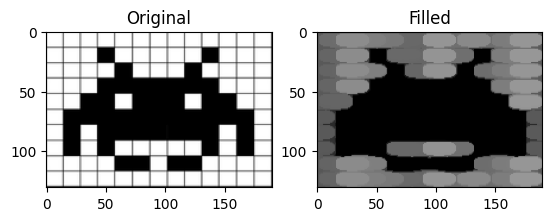

In [18]:
image = cv2.imread('b2.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,10))
res = cv2.morphologyEx(gray,cv2.MORPH_OPEN,kernel)
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.title('Filled')
plt.show()

In [19]:
def fill_holes_morphology(img,mask_size=(5,5)):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, mask_size)
    filled = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    filled = cv2.bitwise_not(filled)
    result = cv2.bitwise_and(img, img, mask=filled)
    return result

The function "fill_holes_morphology" takes an input image and performs the following steps:

1. Conversion to grayscale: It converts the input image from BGR color space to grayscale using `cv2.cvtColor` and stores the result in the variable "gray".

2. Thresholding: It applies a binary inverse thresholding operation to the grayscale image using a threshold value of 1. This converts the image into a binary image where pixels below the threshold are set to 255 (white) and pixels above or equal to the threshold are set to 0 (black). The result is stored in the variable "mask".

3. Kernel creation: It creates a structuring element using `cv2.getStructuringElement`. The shape of the structuring element is specified as `cv2.MORPH_ELLIPSE`, and the size is determined by the "mask_size" parameter.

4. Hole filling: It performs morphological closing on the binary mask using `cv2.morphologyEx` with the created kernel. This operation helps fill in the holes in the binary image. The result is stored in the variable "filled".

5. Inversion: It performs bitwise NOT operation using `cv2.bitwise_not` on the filled image. This converts the filled regions to black and the background to white. The result is stored in the variable "filled".

6. Result generation: It applies bitwise AND operation using `cv2.bitwise_and` on the original image and the filled image using the "filled" mask. This operation preserves the original image pixels where the mask is white (filled regions) and sets the rest to black. The result is stored in the variable "result".

7. Return: It returns the resulting image obtained after hole filling.

By calling this function with an input image, you can obtain the image with filled holes using morphology operations. The function applies thresholding, morphological closing, and bitwise operations to achieve hole filling and returns the result.

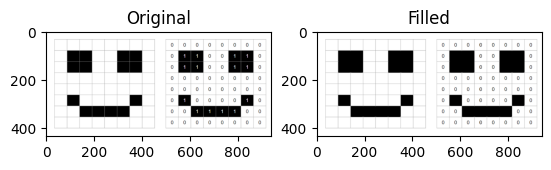

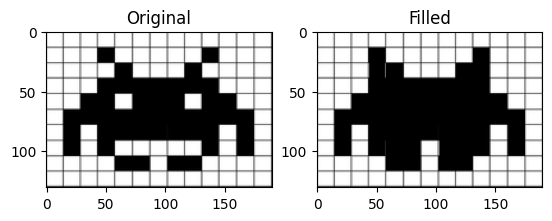

In [20]:
image = cv2.imread('b1.png')
res = (fill_holes_morphology(image,(8,8)))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.title('Filled')
plt.show()

image = cv2.imread('b2.png')
res = (fill_holes_morphology(image,(1,15)))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.title('Filled')
plt.show()
